In [63]:
import numpy as np
import pandas as pd
import random

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

In [65]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
train_df = pd.read_csv('train.csv')
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [67]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Обработка данных

In [68]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

Пропуски

In [69]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [70]:
median1 = (train_df['LifeSquare']/train_df['Square']).median()
train_df.loc[train_df.LifeSquare.isna(), 'LifeSquare'] = train_df.loc[train_df.LifeSquare.isna(), 'Square'] * median1

In [71]:
median2 = train_df['Healthcare_1'].median()
train_df['Healthcare_1'].fillna(median2, inplace=True)

In [72]:
train_df['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [73]:
train_df['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [74]:
train_df['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [75]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
6.0        1
19.0       1
Name: Rooms, dtype: int64

In [76]:
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] > 10, 'Rooms'] = train_df['Rooms'].median()

In [77]:
train_df['Square_per_Room']=train_df['Square']/train_df['Rooms']

In [78]:
train_df['Square_per_Room'].sort_values(ascending=False)

7010    409.425181
9229    320.532596
726     302.352986
7644    212.932361
5283    174.649522
           ...    
9869      2.377248
4496      1.988943
9067      1.607893
328       1.463444
7470      1.136859
Name: Square_per_Room, Length: 10000, dtype: float64

In [79]:
train_df['Rooms_outlier'] = 0
train_df.loc[(train_df['Square_per_Room'] < 3) | (train_df['Square_per_Room'] > 300), 'Rooms_outlier'] = 1
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_per_Room,Rooms_outlier
0,11809,27,3.0,115.027311,71.032470,10.0,4,10.0,2014,0.075424,...,11,3097,0,900.0,0,0,B,305018.871089,38.342437,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,30,6207,1,1183.0,1,0,B,177734.553407,39.832524,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,33,5261,0,240.0,3,1,B,282078.720850,26.114072,0
3,2352,1,1.0,40.409907,24.954209,1.0,10,22.0,1977,0.007122,...,1,264,0,900.0,0,1,B,168106.007630,40.409907,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,900.0,0,6,B,343995.102962,32.142534,0


In [80]:
train_df['Square_per_Room']

0       38.342437
1       39.832524
2       26.114072
3       40.409907
4       32.142534
          ...    
9995    24.545364
9996    32.153842
9997    29.648057
9998    32.330292
9999    35.815476
Name: Square_per_Room, Length: 10000, dtype: float64

In [81]:
train_df.tail(131)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_per_Room,Rooms_outlier
9869,3224,27,1.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,2,469,0,900.0,0,0,B,126596.941798,2.377248,1
9870,1178,9,3.0,82.247909,80.049163,1.0,9,1.0,1977,0.161532,...,25,5648,1,30.0,2,4,B,236541.355539,27.415970,0
9871,234,42,2.0,53.231509,31.596949,9.0,10,12.0,2008,0.158249,...,21,5731,0,900.0,1,0,B,234644.061904,26.615754,0
9872,3999,191,3.0,77.786279,48.431994,10.0,14,16.0,1982,0.127376,...,43,8429,3,900.0,3,9,B,312380.331269,25.928760,0
9873,15219,23,1.0,34.632986,36.129394,1.0,4,3.0,2015,0.034656,...,0,168,0,900.0,0,0,B,87806.957199,34.632986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,52,10311,6,900.0,1,9,B,119367.455796,24.545364,0
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,2,629,1,900.0,0,0,A,199715.148807,32.153842,0
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,20,4386,14,900.0,1,5,B,165953.912580,29.648057,0
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,47,8004,3,125.0,3,5,B,171842.411855,32.330292,0


In [82]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_per_Room,Rooms_outlier
0,11809,27,3.0,115.027311,71.032470,10.0,4,10.0,2014,0.075424,...,11,3097,0,900.0,0,0,B,305018.871089,38.342437,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,30,6207,1,1183.0,1,0,B,177734.553407,39.832524,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,33,5261,0,240.0,3,1,B,282078.720850,26.114072,0
3,2352,1,1.0,40.409907,24.954209,1.0,10,22.0,1977,0.007122,...,1,264,0,900.0,0,1,B,168106.007630,40.409907,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,900.0,0,6,B,343995.102962,32.142534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,52,10311,6,900.0,1,9,B,119367.455796,24.545364,0
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,2,629,1,900.0,0,0,A,199715.148807,32.153842,0
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,20,4386,14,900.0,1,5,B,165953.912580,29.648057,0
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,47,8004,3,125.0,3,5,B,171842.411855,32.330292,0


In [83]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

KitchenSquare

In [84]:
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
112.0        2
51.0         2
58.0         2
37.0         2
32.0         2
41.0         2
43.0         2
30.0         2
25.0         2
39.0         1
23.0         1
123.0        1
40.0         1
48.0         1
21.0         1
72.0         1
27.0         1
63.0         1
1970.0       1
29.0         1
66.0         1
2014.0       1
31.0         1
78.0         1
35.0         1
42.0         1
73.0         1
60.0         1
84.0         1
26.0         1
54.0         1
36.0         1
53.0         1
96.0         1
62.0         1
75.0         1
Name: KitchenSquare, dtype: int64

In [85]:
train_df['KitchenSquare'].quantile(.975), train_df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [86]:
condition = (train_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > 150)
        
train_df.loc[condition, 'KitchenSquare'] = train_df['KitchenSquare'].median()

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [87]:
train_df['KitchenSquare'].value_counts() 

3.0      3183
8.0      1306
5.0      1169
10.0     1075
6.0      1040
9.0       843
7.0       609
12.0      249
11.0      233
13.0       67
14.0       51
4.0        39
15.0       31
16.0       16
20.0       14
17.0       12
19.0       11
18.0        6
22.0        3
32.0        2
43.0        2
58.0        2
41.0        2
51.0        2
25.0        2
30.0        2
112.0       2
37.0        2
27.0        1
31.0        1
66.0        1
48.0        1
42.0        1
72.0        1
60.0        1
54.0        1
36.0        1
39.0        1
62.0        1
123.0       1
29.0        1
53.0        1
84.0        1
78.0        1
40.0        1
26.0        1
21.0        1
63.0        1
35.0        1
73.0        1
23.0        1
96.0        1
75.0        1
Name: KitchenSquare, dtype: int64

Floor, Housefloor

In [88]:
train_df['Floor'].value_counts() 

4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
42      1
37      1
33      1
31      1
Name: Floor, dtype: int64

In [89]:
train_df['HouseFloor'].value_counts() 

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
37.0        4
32.0        4
28.0        3
39.0        2
48.0        2
99.0        2
29.0        1
44.0        1
47.0        1
36.0        1
31.0        1
38.0        1
117.0       1
45.0        1
26.0        1
Name: HouseFloor, dtype: int64

In [90]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1825

In [91]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [92]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [93]:
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

HouseYear

In [94]:
train_df['HouseYear'].value_counts() 

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1928           1
1947           1
1914           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [95]:
train_df.loc[train_df['HouseYear'] > 2021, 'HouseYear'] = 2021

In [96]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

In [97]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
174      1
199      1
209      1
207      1
117      1
Name: DistrictId, Length: 205, dtype: int64

In [98]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_per_Room,Rooms_outlier
0,11809,27,3.0,115.027311,71.032470,10.0,4,10.0,2014,0.075424,...,11,3097,0,900.0,0,0,1,305018.871089,38.342437,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,30,6207,1,1183.0,1,0,1,177734.553407,39.832524,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,33,5261,0,240.0,3,1,1,282078.720850,26.114072,0
3,2352,1,1.0,40.409907,24.954209,3.0,10,22.0,1977,0.007122,...,1,264,0,900.0,0,1,1,168106.007630,40.409907,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,900.0,0,6,1,343995.102962,32.142534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,52,10311,6,900.0,1,9,1,119367.455796,24.545364,0
9996,16265,27,2.0,64.307684,37.038420,9.0,13,13.0,1977,0.072158,...,2,629,1,900.0,0,0,0,199715.148807,32.153842,0
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,20,4386,14,900.0,1,5,1,165953.912580,29.648057,0
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,47,8004,3,125.0,3,5,1,171842.411855,32.330292,0


In [99]:
med_price_by_district = train_df.groupby(['DistrictId', 'HouseYear'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,HouseYear,MedPriceByDistrict
0,0,1959,221660.251771
1,0,1960,339228.823764
2,0,1961,115835.592141
3,0,1962,139395.378454
4,0,1963,147258.736617


In [100]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'HouseYear'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_per_Room,Rooms_outlier,MedPriceByDistrict
0,11809,27,3.0,115.027311,71.032470,10.0,4,10.0,2014,0.075424,...,3097,0,900.0,0,0,1,305018.871089,38.342437,0,142393.084641
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,6207,1,1183.0,1,0,1,177734.553407,39.832524,0,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,5261,0,240.0,3,1,1,282078.720850,26.114072,0,201063.129825
3,2352,1,1.0,40.409907,24.954209,3.0,10,22.0,1977,0.007122,...,264,0,900.0,0,1,1,168106.007630,40.409907,0,188189.008076
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,8667,2,900.0,0,6,1,343995.102962,32.142534,0,249188.275443


In [101]:
train_corr=train_df.corr()
train_corr

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Square_per_Room,Rooms_outlier,MedPriceByDistrict
Rooms,1.000000,0.680803,0.147166,0.105181,-0.012058,-0.038648,-0.042658,-0.030878,-0.002125,-0.006230,...,0.075088,0.013498,0.037298,0.066322,0.055697,-0.000478,0.565902,-0.542342,-0.010242,0.331294
Square,0.680803,1.000000,0.210389,0.149318,0.086205,0.104173,0.179477,-0.064479,0.029926,0.022748,...,-0.043120,0.035241,-0.034853,-0.022960,0.021357,-0.049380,0.520075,0.170732,0.152071,0.294705
LifeSquare,0.147166,0.210389,1.000000,0.009589,0.017135,0.021513,0.054188,-0.023320,0.007062,0.008566,...,-0.032494,0.007721,-0.008562,-0.020269,-0.006235,-0.006961,0.091258,0.035051,0.046464,0.037484
KitchenSquare,0.105181,0.149318,0.009589,1.000000,0.086255,0.123665,0.209380,0.008182,0.005398,-0.039065,...,0.190970,-0.055302,0.047017,0.102906,0.050786,0.001962,0.232592,0.015263,-0.016840,0.223297
Floor,-0.012058,0.086205,0.017135,0.086255,1.000000,0.624261,0.257831,-0.007203,0.039370,0.016266,...,-0.007163,-0.010828,-0.088260,-0.056586,0.011900,0.010248,0.097323,0.106395,-0.009725,0.084748
HouseFloor,-0.038648,0.104173,0.021513,0.123665,0.624261,1.000000,0.396660,-0.019938,0.067781,0.018863,...,-0.034052,-0.017172,-0.117241,-0.100367,0.000926,0.001707,0.087143,0.160116,0.000211,0.085619
HouseYear,-0.042658,0.179477,0.054188,0.209380,0.257831,0.396660,1.000000,-0.065975,0.076825,0.047216,...,0.013629,-0.049271,-0.171556,-0.115530,-0.001886,-0.058700,0.036738,0.244641,0.011533,0.032036
Ecology_1,-0.030878,-0.064479,-0.023320,0.008182,-0.007203,-0.019938,-0.065975,1.000000,-0.110725,-0.223197,...,0.009264,-0.124068,0.004375,0.030873,-0.076749,0.079809,-0.058381,-0.023359,-0.000705,-0.047470
Ecology_2,-0.002125,0.029926,0.007062,0.005398,0.039370,0.067781,0.076825,-0.110725,1.000000,-0.016643,...,-0.012709,0.008512,-0.046609,-0.082667,0.051892,0.022242,0.022379,0.036959,0.003284,0.021816
Ecology_3,-0.006230,0.022748,0.008566,-0.039065,0.016266,0.018863,0.047216,-0.223197,-0.016643,1.000000,...,0.007394,0.014595,-0.137952,-0.133120,0.001859,-0.050425,-0.052585,0.037061,0.005580,-0.068970


<AxesSubplot:>

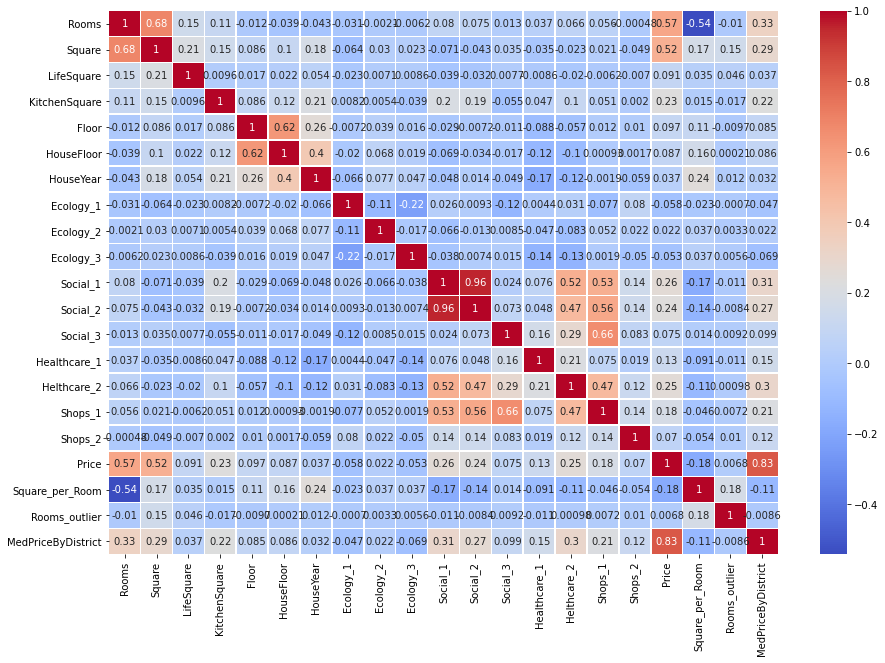

In [102]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(train_corr, annot = True, linewidths = .5, cmap = 'coolwarm')

In [103]:
high_corr = train_corr[train_corr['Price'].abs() > 0.5].index.tolist()
high_corr.remove('Price')

high_corr

['Rooms', 'Square', 'MedPriceByDistrict']

In [104]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [105]:
X = train_df.drop(columns='Price')
y = train_df['Price']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [107]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8, 8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    plt.show()

In [118]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

R2:	0.873
RMSE:	32562.094
MSE:	1060289976.415


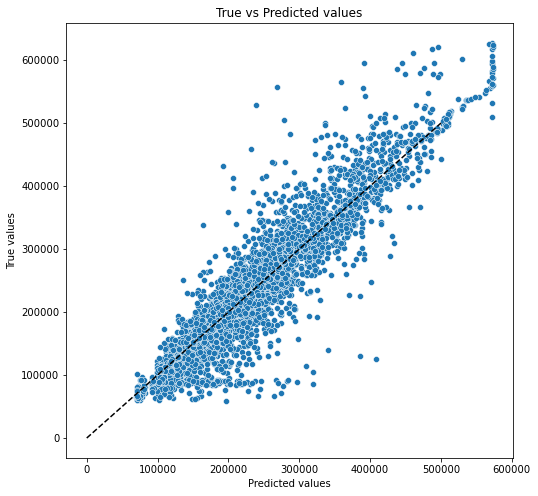

In [119]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20,   
                                 min_samples_leaf=17, 
                                 random_state=42, 
                                 n_estimators=300
                                 )

rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.842
RMSE:	38171.157
MSE:	1457037220.226


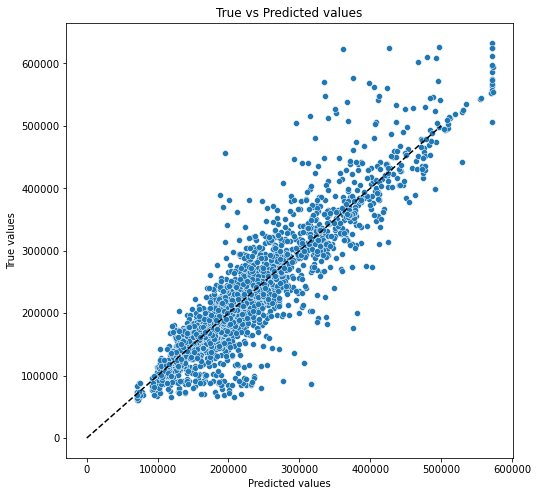

In [120]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [121]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.81904287, 0.83253342, 0.8232722 ])

Тестирование

In [112]:
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [113]:
train_df.dtypes

Id                     object
DistrictId             object
Rooms                 float64
Square                float64
LifeSquare            float64
KitchenSquare         float64
Floor                   int64
HouseFloor            float64
HouseYear               int64
Ecology_1             float64
Ecology_2               int64
Ecology_3               int64
Social_1                int64
Social_2                int64
Social_3                int64
Healthcare_1          float64
Helthcare_2             int64
Shops_1                 int64
Shops_2                 int64
Price                 float64
Square_per_Room       float64
Rooms_outlier           int64
MedPriceByDistrict    float64
dtype: object

In [87]:
binary_to_numbers = {'A': 0, 'B': 1}

test_df['Ecology_2'] = test_df['Ecology_2'].replace(binary_to_numbers)
test_df['Ecology_3'] = test_df['Ecology_3'].replace(binary_to_numbers)
test_df['Shops_2'] = test_df['Shops_2'].replace(binary_to_numbers)

In [88]:
median3 = (test_df['LifeSquare']/test_df['Square']).median()
test_df.loc[test_df.LifeSquare.isna(), 'LifeSquare'] = test_df.loc[test_df.LifeSquare.isna(), 'Square'] * median3

In [89]:
median4 = test_df['Healthcare_1'].median()
test_df['Healthcare_1'].fillna(median4, inplace=True)

In [90]:
test_df['KitchenSquare'].value_counts()

1.0      1191
5.0       612
8.0       606
6.0       595
10.0      558
9.0       417
0.0       335
7.0       297
12.0      132
11.0      107
13.0       33
4.0        21
14.0       20
15.0       17
16.0       13
3.0        11
17.0        5
2.0         4
18.0        3
42.0        3
19.0        2
20.0        2
65.0        1
34.0        1
60.0        1
112.0       1
44.0        1
33.0        1
40.0        1
22.0        1
61.0        1
97.0        1
62.0        1
24.0        1
41.0        1
30.0        1
57.0        1
620.0       1
Name: KitchenSquare, dtype: int64

In [91]:
condition = (test_df['KitchenSquare'].isna()) \
             | (train_df['KitchenSquare'] > 150)
        
test_df.loc[condition, 'KitchenSquare'] = test_df['KitchenSquare'].median()

test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [92]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()

In [93]:
floor_outliers1 = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index
floor_outliers1

Int64Index([  11,   12,   14,   21,   22,   25,   26,   42,   46,   47,
            ...
            4951, 4952, 4960, 4971, 4973, 4976, 4978, 4980, 4982, 4995],
           dtype='int64', length=792)

In [131]:
test_df.loc[floor_outliers1, 'Floor'] = test_df.loc[floor_outliers1, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

In [132]:
test_df.loc[test_df['HouseYear'] > 2021, 'HouseYear'] = 2021

In [122]:
test_df.loc[test_df['Rooms'] == 0, 'Rooms'] = 1
test_df.loc[test_df['Rooms'] > 10, 'Rooms'] = test_df['Rooms'].median()

In [ ]:
test_df['Square_per_Room']=test_df['Square']/test_df['Rooms']

In [133]:
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1036.0,1,1,1
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0
2,960,27,2.0,59.463678,36.843185,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,900.0,0,1,1
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,900.0,0,0,1
4,746,74,1.0,53.837056,33.356978,3.0,8,17.0,1977,0.309479,1,1,35,7715,4,990.0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,4,5.0,1962,0.069660,1,1,31,6119,4,900.0,1,2,1
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,1,1,15,2787,2,520.0,0,7,1
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,1,1,28,6533,1,1015.0,2,5,1
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,1,1,33,7976,5,900.0,0,11,1


In [124]:
test_df.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

In [125]:
predictions = rf_model.predict(test_df)
predictions

array([163850.25383497, 121679.54579114, 145851.4566724 , ...,
       148421.69689906, 181921.24961329, 276654.10576765])

In [126]:
submission = pd.DataFrame({ 'Id': test_df['Id'], 'Price': predictions })
submission.to_csv("my_submission.csv", index=False)
submission

,Id,Price
0,4567,163850.253835
1,5925,121679.545791
2,960,145851.456672
3,3848,126965.512832
4,746,204161.619912
...,...,...
4995,10379,178300.516545
4996,16138,374674.178928
4997,3912,148421.696899
4998,5722,181921.249613


In [99]:
submission['id'] = test_df['Id']

In [100]:
submission

,Id,Price,id
0,4567,163850.253835,4567
1,5925,121679.545791,5925
2,960,145851.456672,960
3,3848,126965.512832,3848
4,746,204161.619912,746
...,...,...,...
4995,10379,178300.516545,10379
4996,16138,374674.178928,16138
4997,3912,148421.696899,3912
4998,5722,181921.249613,5722
